In [1]:
%matplotlib inline

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
mpl.rcParams['figure.figsize'] = [4, 3]

In [4]:
results_nn = {
    'True labels': [
  (0.8212, 0.7568, 0.6444, 0.8412),
  (0.0009486832980505138,
   0.002716615541441225,
   0.0040112342240263155,
   0.0008544003745317531)],
    'Likelihood': [
  (0.798, 0.6975, 0.5992, 0.8361),
  (0.002816025568065745,
   0.002220360331117452,
   0.010404326023342405,
   0.0008544003745317531)],
 'Constrained MSE': [
  (0.7957, 0.6958, 0.5932, 0.8349),
  (0.002022374841615668,
   0.0018248287590894659,
   0.011403946685248929,
   0.0006708203932499369)]
 }

   'sWeights': [(0.1, 0.01, 0.001, 1.0),
  (0.7894, 0.6326, 0.5993, 0.8334),
  (0.0017262676501632068,
   0.008305419917138446,
   0.01920234360696631,
   0.0009486832980505138)],

In [5]:
train_sizes_nn = 8e8*np.array((0.1, 0.01, 0.001, 1.0))

In [6]:
with open("Higgs_scores.pkl", 'rb') as higgs_scores_file:
    train_sizes_cb, results_cb = pickle.load(higgs_scores_file)
results_cb_corrected = {}
# correct var -> std
for model_name in results_cb:
    results_cb[model_name][1] = np.sqrt(results_cb[model_name][1])

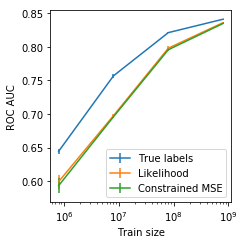

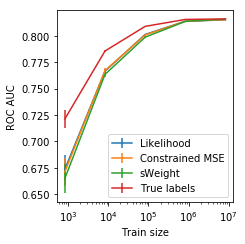

In [7]:
for train_sizes, results, filename in (
    (train_sizes_nn, results_nn, "Higgs_NN.pdf"),
    (train_sizes_cb, results_cb, "Higgs_cb.pdf")):
    fig, ax = plt.subplots(figsize=(3.5, 3.5))
    for method_name, method_result in results.items():
        order = np.argsort(train_sizes)
        ax.errorbar(train_sizes[order],
                    np.array(method_result[0])[order],
                    yerr=np.array(method_result[1])[order], label=method_name)
    ax.legend()
    ax.set_xlabel("Train size")
    ax.set_ylabel("ROC AUC")
    ax.set_xscale("log")
    plt.tight_layout()
    fig.savefig(filename, bbox="tight");